## `ARIMA Models in Python | ARMA Models`

### `01: Exploration`
You may make plots regularly, but in this course, it is important that you can explicitly control which axis different time series are plotted on. This will be important so you can evaluate your time series predictions later.

Here your task is to plot a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

- Import `matplotlib.pyplot` giving it the alias `plt` and import `pandas` giving it the alias `pd`.
- Load in the candy production time series `'candy_production.csv'` using `pandas`, set the index to the'date'column, parse the dates and assign it to the variable `candy`.
- Plot the time series onto the axis `ax1` using the DataFrame's `.plot()` method. Then show the plot.

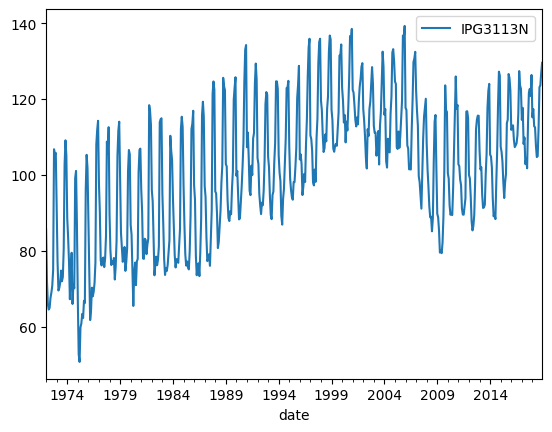

In [5]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Load in the time series
candy = pd.read_csv('datasets/candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

Sweet work! This plotting method will be invaluable later when plotting multiple things on the same axis! Can you tell whether this is a stationary time series or not? How does it change throughout the year and across many years?



### `02: Train-test splits`
In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

The candy production data set has been loaded in for you as candy already and pyplot has been loaded in as plt.

- Split the time series into train and test sets by slicing with `datetime` indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.
- Make a `pyplot` axes using the `subplots()` function.
- Use the DataFrame's `.plot()` method to plot the train and test sets on the axis `ax`.

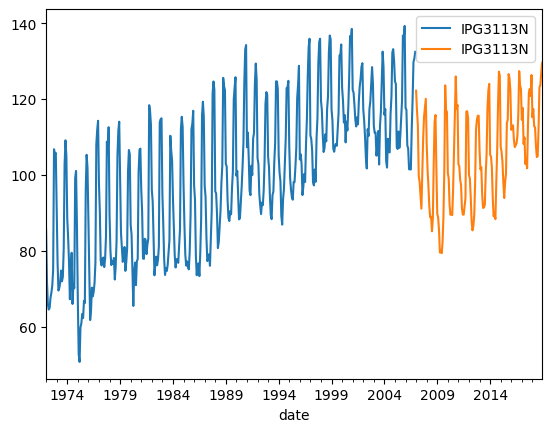

In [7]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

Great! Take a look at the plot, do you think that you yourself could predict what happens after 2006 given the blue training set. What happens to the long term trend and the seasonal pattern?



### `03: Is it stationary`
Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

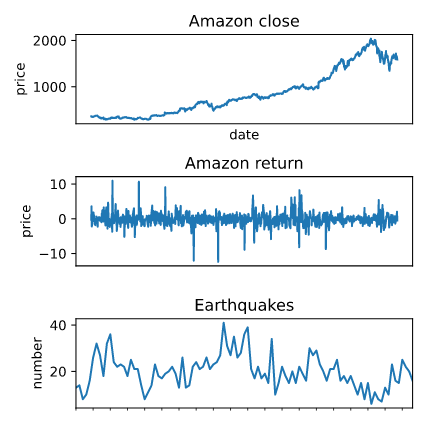

Question
The top plot shown is a time series of Amazon stock close price.

`3.1 Is the stock close price stationary?`

- No, because in the top plot, the dynamics change with time.
- No, because in the top plot, the variance changes with time.
- No, because the top plot has a trend. ✅
- Yes, the top plot appears to be stationary.

Question
The middle plot shown is a time series of the return (percentage increase of price per day) of Amazon stock.

`3.2 Is the stock return stationary?`

- No, because in the middle plot, the dynamics change with time.
- No, because in the middle plot, the variance changes with time.✅
- No, because the top middle has a trend. 
- Yes, the middle plot appears to be stationary.


Question
The bottom plot is a time series of the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater).

`3.3 Is the number of major earthquakes per year stationary?` 

- No, because in the middle plot, the dynamics change with time.
- No, because in the middle plot, the variance changes with time.
- No, because the top middle has a trend. 
- Yes, the middle plot appears to be stationary.✅

Great! You can't see any trend, or any obvious changes in variance, or dynamics. This time series looks stationary.



### `04: Augmented Dicky-Fuller`
In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

- Import the augmented Dicky-Fuller function `adfuller()` from `statsmodels`.
- Run the `adfuller()` function on the `'earthquakes_per_year'` column of the `earthquake` DataFrame and assign the result to `result`.
- Print the test statistic, the p-value and the critical values.

In [9]:
earthquake = pd.read_csv('datasets/earthquakes.csv', 
            index_col='date',
            parse_dates=True)

# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.183192251191782
0.02097842525600371
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


Earth shaking effort! You can reject the null hypothesis that the time series is non-stationary. Therefore it is stationary. You probably could have intuited this from looking at the graph or by knowing a little about geology. The time series covers only about 100 years which is a very short time on a geological time scale.



### `05: Taking the difference`
In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

- Run the augmented Dicky-Fuller on the `'city_population'` column of `city`.
Print the test statistic and the p-value.

- Take the first difference of `city` dropping the `NaN` values. Assign this to `city_stationary` and run the test again.

- Take the second difference of `city`, by applying the `.diff()` method twice and drop the `NaN` values.



In [ ]:
city = pd.read_csv('datasets/earthquakes.csv', 
            index_col='date',
            parse_dates=True)

In [ ]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])